## Reading and Exploring the Dataset

In [5]:
words = open('names.txt', 'r').read().splitlines()

In [6]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
len(words)

32033

In [8]:
min(len(w) for w in words)

2

In [9]:
max(len(w) for w in words)

15

## Bigrams

### Approach 1: Counting

In [28]:
b = {}

for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [29]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [46]:
w

'zzyzx'

In [47]:
list(w)

['z', 'z', 'y', 'z', 'x']

In [45]:
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [48]:
import torch

In [85]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [94]:
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [95]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [96]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

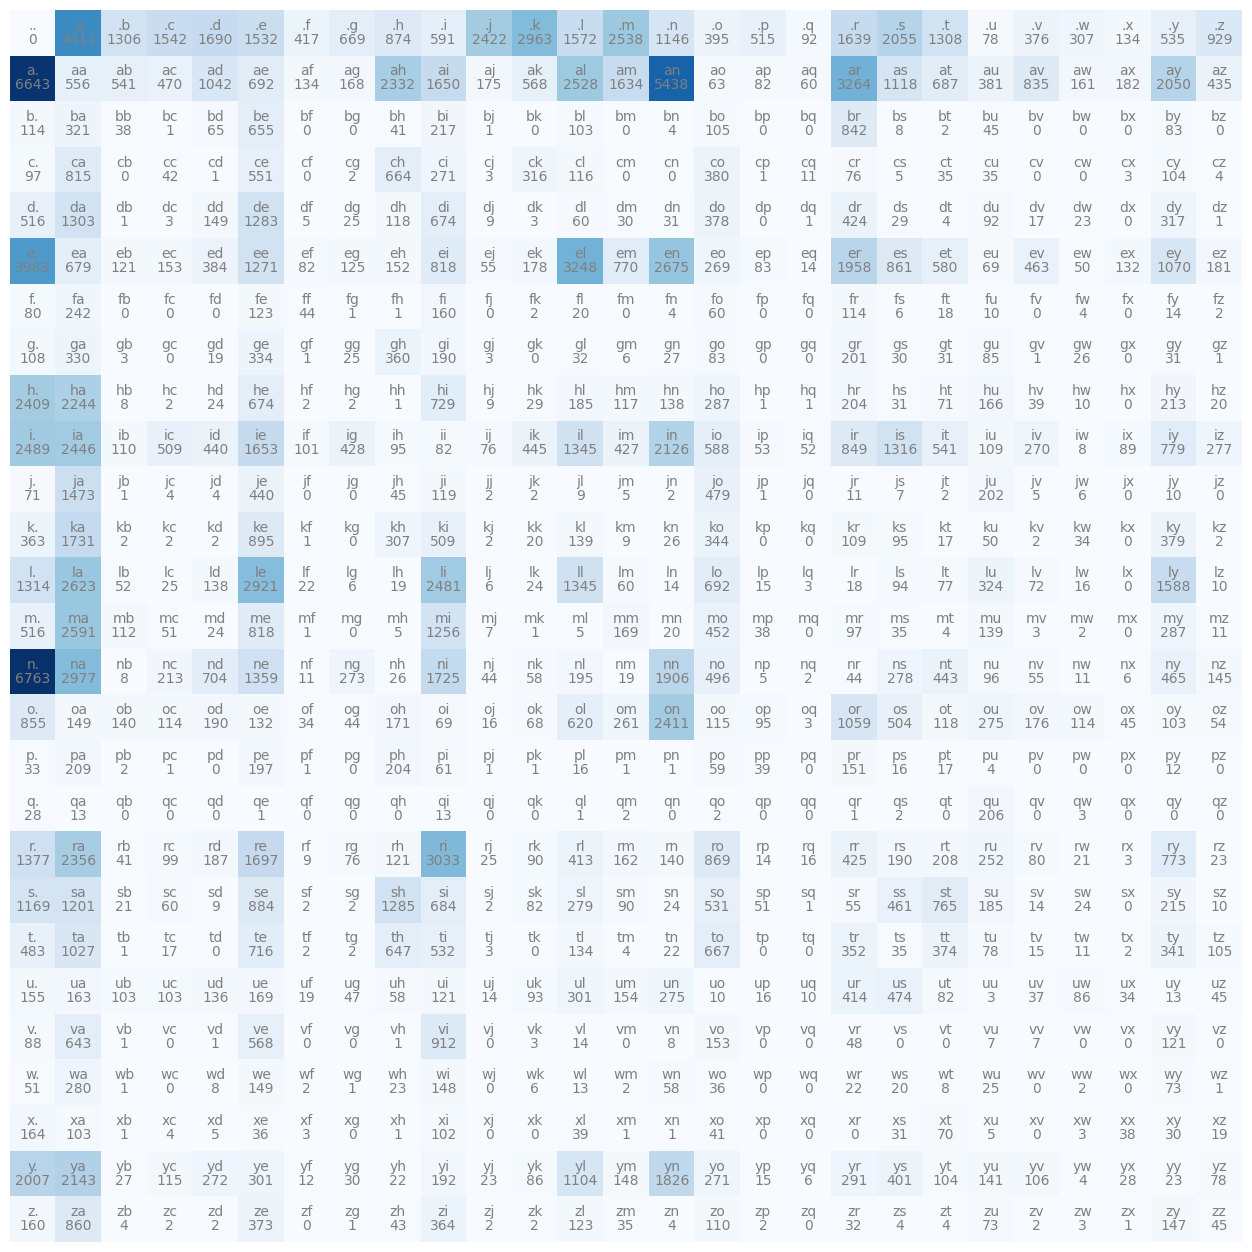

In [209]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [142]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [143]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [145]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]
# ix

'j'

In [138]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [153]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([25,  0,  9,  0, 14, 18,  8,  9,  0,  9,  9,  8, 14, 13, 13, 14, 14, 13,
        12, 12])

In [164]:
P.shape

torch.Size([27, 27])

In [187]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [204]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [205]:
P[0].sum()

tensor(1.0000)

In [213]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    # untrained model
    # p = torch.ones(27) / 27.0

    # trained on bigram
    # p = N[ix].float()
    # p = p / p.sum()
    p = P[ix]

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])

    if ix == 0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.


Note:
Read through boradcasting semantics, treat it with respect, really understand it, look up some tutorials and practice it. [https://pytorch.org/docs/stable/notes/broadcasting.html](https://pytorch.org/docs/stable/notes/broadcasting.html)

In [214]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
# for w in ['andrejq']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

# print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n:.4f}')

nll=tensor(38.7896)
2.4244


In [215]:
1/27

0.037037037037037035

Goal: maximaze likelifood of teh data with respective to model parameters (statistical modeling) 
equicalent in maximizing the log likelihood (because log is monotonic)
equivalent to minimizing teh negative log likelihood
equivalent to minimizing the average negative log likelhood

log(a+b+c) = log(a) + log(b) + log(c)

### Approach 2: Neural Network 

In [217]:
# Create the training set of all the biagrams (x, y)

xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [218]:
xs

tensor([ 0,  5, 13, 13,  1])

In [219]:
ys

tensor([ 5, 13, 13,  1,  0])

In [226]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [227]:
xenc.shape

torch.Size([5, 27])

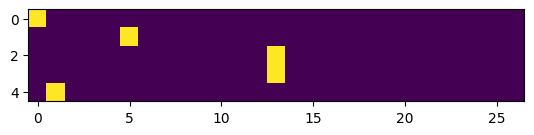

In [228]:
plt.imshow(xenc)

In [252]:
xenc.dtype

torch.float32

In [253]:
w = torch.randn((27, 27))

# @ is the matrix multiplication sing in pytorch
xenc @ w

tensor([[ 0.1383, -0.4494,  0.1119,  1.2313,  0.8150,  0.0776,  0.8673,  0.7757,
         -1.1629, -0.1846, -1.4111,  2.1545, -0.8827, -1.6603, -0.6517, -0.3925,
          0.9117,  0.2144, -0.5516, -0.3661, -0.1532,  1.0075,  2.8537,  0.7760,
         -0.0929,  0.2990, -0.3950],
        [ 1.6346,  1.5758,  1.3673,  1.0272, -1.1721,  0.1744,  0.9042, -1.6539,
          0.4763, -0.1853,  0.8654, -0.1476,  0.3385, -0.7701,  0.8673, -0.3078,
         -2.7129,  3.2251,  1.2908, -0.8410,  1.2158, -0.0247, -0.5628, -1.6463,
         -0.6942, -1.5257, -0.4261],
        [-0.8214, -1.4440, -1.3527,  0.0359, -0.2640,  0.3089, -1.2387,  1.6163,
         -1.6869, -1.1329, -0.2253,  0.2798,  1.3974, -0.2731, -1.4964, -0.2186,
         -0.5060, -1.8906, -0.2105, -0.5904, -0.1650,  0.6672, -0.3706,  0.3738,
         -1.3439, -0.5878,  1.1964],
        [-0.8214, -1.4440, -1.3527,  0.0359, -0.2640,  0.3089, -1.2387,  1.6163,
         -1.6869, -1.1329, -0.2253,  0.2798,  1.3974, -0.2731, -1.4964, -0.2186

In [263]:
# (xenc @ w)[3, 13]

In [261]:
# xenc[3]
# w[:, 13]
# (xenc[3] * w[:, 13]).sum()

In [267]:
logits = (xenc @ w) # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0201, 0.0112, 0.0196, 0.0600, 0.0396, 0.0189, 0.0417, 0.0381, 0.0055,
         0.0146, 0.0043, 0.1511, 0.0072, 0.0033, 0.0091, 0.0118, 0.0436, 0.0217,
         0.0101, 0.0121, 0.0150, 0.0480, 0.3039, 0.0381, 0.0160, 0.0236, 0.0118],
        [0.0762, 0.0719, 0.0583, 0.0415, 0.0046, 0.0177, 0.0367, 0.0028, 0.0239,
         0.0124, 0.0353, 0.0128, 0.0209, 0.0069, 0.0354, 0.0109, 0.0010, 0.3739,
         0.0540, 0.0064, 0.0501, 0.0145, 0.0085, 0.0029, 0.0074, 0.0032, 0.0097],
        [0.0151, 0.0081, 0.0089, 0.0357, 0.0264, 0.0468, 0.0100, 0.1732, 0.0064,
         0.0111, 0.0275, 0.0455, 0.1391, 0.0262, 0.0077, 0.0276, 0.0207, 0.0052,
         0.0279, 0.0191, 0.0292, 0.0670, 0.0237, 0.0500, 0.0090, 0.0191, 0.1138],
        [0.0151, 0.0081, 0.0089, 0.0357, 0.0264, 0.0468, 0.0100, 0.1732, 0.0064,
         0.0111, 0.0275, 0.0455, 0.1391, 0.0262, 0.0077, 0.0276, 0.0207, 0.0052,
         0.0279, 0.0191, 0.0292, 0.0670, 0.0237, 0.0500, 0.0090, 0.0191, 0.1138],
        [0.0186, 0.0113,

In [268]:
probs[0].sum()

tensor(1.0000)

In [270]:
probs.shape

torch.Size([5, 27])

In [271]:
probs[0]

tensor([0.0201, 0.0112, 0.0196, 0.0600, 0.0396, 0.0189, 0.0417, 0.0381, 0.0055,
        0.0146, 0.0043, 0.1511, 0.0072, 0.0033, 0.0091, 0.0118, 0.0436, 0.0217,
        0.0101, 0.0121, 0.0150, 0.0480, 0.3039, 0.0381, 0.0160, 0.0236, 0.0118])

In [272]:
# (5, 27)  @ (27, 27) -> (5, 27)

In [273]:
# SUMMARY -----------------------------------------------

In [281]:
# inputs dataset
xs

tensor([ 0,  5, 13, 13,  1])

In [302]:
# labels for correct next character in sequence
ys

tensor([ 5, 13, 13,  1,  0])

In [303]:
# randomly initializing 27 neurons weights each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27, 27), generator=g)

In [304]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network one-hot encoding
logits = (xenc @ w) # log-counts # predict log counts
counts = logits.exp() # equivalent N # counts
probs = counts / counts.sum(1, keepdim=True) # probabilities for next character
# btw the last 2 lines here are together called a softmax

# everything in this block is differentiable operation and we can back propagate through this

In [305]:
probs.shape

torch.Size([5, 27])

In [306]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram
  x = xs[i].item() # input chatacter index
  y = ys[i].item() # label chatacter index
  print('-------------------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character): ', y)
  p = probs[i, y]
  print('probability assigned by the net to the correct character: ', p.item())
  logp = torch.log(p)
  print('log likelifood: ', logp.item())
  nll = -logp
  print('negative log likelihood: ', nll.item())
  nlls[i] = nll

print('===================')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())

-------------------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character):  5
probability assigned by the net to the correct character:  0.01228625513613224
log likelifood:  -4.399273872375488
negative log likelihood:  4.399273872375488
-------------------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character):  13
probability assigned by the net to the 

In [307]:
# OPTIMIZATION

In [308]:
xs

tensor([ 0,  5, 13, 13,  1])

In [309]:
ys

tensor([ 5, 13, 13,  1,  0])

In [326]:
# randomly initailizing 27 neurons weights each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27, 27), generator=g, requires_grad=True)

In [323]:
# probs.shape

In [322]:
# probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

In [321]:
# torch.arange(5)

In [320]:
# loss = -probs[torch.arange(5), ys].log().mean()
# loss

In [382]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network one-hot encoding
logits = (xenc @ w) # log-counts # predict log counts
counts = logits.exp() # equivalent N # counts
probs = counts / counts.sum(1, keepdim=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.5507, grad_fn=<NegBackward0>)

In [383]:
print(loss.item())

3.5506606101989746


In [384]:
# backward pass
w.grad = None # set to zero the gradient
loss.backward()

In [334]:
# w.grad

In [331]:
w.grad.shape

torch.Size([27, 27])

In [381]:
w.data += -0.1 * w.grad

In [385]:
# --------- !!! OPTIMIZATION !!!  --------------

In [435]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [440]:
# gradient descent
for k in range(500):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.4805402755737305
2.480539560317993
2.480538845062256


2.4805383682250977
2.4805378913879395
2.480537176132202
2.480536937713623
2.4805362224578857
2.4805355072021484
2.4805350303649902
2.480534553527832
2.480534076690674
2.4805338382720947
2.4805331230163574
2.48053240776062
2.480532169342041
2.4805314540863037
2.4805309772491455
2.4805307388305664
2.480530023574829
2.480529546737671
2.4805288314819336
2.4805283546447754
2.480527877807617
2.480527639389038
2.48052716255188
2.4805266857147217
2.4805262088775635
2.480525493621826
2.480525016784668
2.4805245399475098
2.4805238246917725
2.4805238246917725
2.480522871017456
2.480522632598877
2.4805219173431396
2.4805214405059814
2.4805212020874023
2.480520486831665
2.480520248413086
2.4805197715759277
2.4805195331573486
2.4805188179016113
2.480518341064453
2.480517864227295
2.4805171489715576
2.4805171489715576
2.4805166721343994
2.480516195297241
2.480515718460083
2.4805150032043457
2.4805150032043457
2.4805142879486084
2.4805140495300293
2.480513572692871
2.480513095855713
2.4805126190185547

In [443]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


junide.
janasah.
p.
cfay.
a.
nn.
kohin.
tolian.
juwe.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jenh.
anarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
ewafabrenelah.
anen.
ch.
k.
jan.
odridrdze.
jialilpergha.
tezralelia.


## Summary
we got introduce to the bigram character level language model we saw how we can train the model, how we can sample from the model and how we can evaluate the quality of the model using the negative log likelihood loss.

We train the model in 2 completey different ways that react to the same result. in first way we just counted up the frequency of all the biagrams and normalize it, and in second way we use the negative log likelihood loss as a guide to optimizing the counts matrix or the counts array so the loss is minimize in the gradient base framework.

The gradient base framework is more flexible and right now our neural network is super simple we are taking a single previous character and we are taking it through a single linear layer to calculate the logits. this is about to complexify further.

### Additional Exercises:
E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?
E06: meta-exercise! Think of a fun/interesting exercise and complete it.